<a href="https://colab.research.google.com/github/Viny2030/polars/blob/main/Polars_and_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/rapidsai


https://hub.docker.com/r/rapidsai/rapidsai/


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
phamletunhi_data_analysis2024_test_data_polars_vs_pandas_path = kagglehub.dataset_download('phamletunhi/data-analysis2024-test-data-polars-vs-pandas')

print('Data source import complete.')

100%|██████████| 2.02G/2.02G [00:29<00:00, 73.7MB/s]

Extracting files...


Data source import complete.


# Polars & Pandas
## Similarities
### DataFrame Creation:

In [ ]:
# Pandas
import pandas as pd
data = {'A': [1, 2, 3], 'B': [4, 5, 6]}
df_pandas = pd.DataFrame(data)

# Polars
import polars as pl
data = {'A': [1, 2, 3], 'B': [4, 5, 6]}
df_polars = pl.DataFrame(data)

In [ ]:
print(df_pandas)
print(df_polars)

   A  B
0  1  4
1  2  5
2  3  6
shape: (3, 2)
┌─────┬─────┐
│ A   ┆ B   │
│ --- ┆ --- │
│ i64 ┆ i64 │
╞═════╪═════╡
│ 1   ┆ 4   │
│ 2   ┆ 5   │
│ 3   ┆ 6   │
└─────┴─────┘


### Column Selection:



In [ ]:
# Pandas
column_pandas = df_pandas['A']

# Polars
column_polars = df_polars['A']

print("pandas: ",column_pandas)
print("-----------------------------------")
print("polars: ",column_polars)

pandas:  0    1
1    2
2    3
Name: A, dtype: int64
-----------------------------------
polars:  shape: (3,)
Series: 'A' [i64]
[
	1
	2
	3
]


## Differences
### Adding Columns:



In [ ]:
# Pandas
df_pandas['C'] = df_pandas['A'] + df_pandas['B']

# Polars
df_polars = df_polars.with_columns((pl.col('A') + pl.col('B')).alias('C'))

print("Pandas: \n", df_pandas)
print("Polars: ",df_polars)

Pandas: 
    A  B  C
0  1  4  5
1  2  5  7
2  3  6  9
Polars:  shape: (3, 3)
┌─────┬─────┬─────┐
│ A   ┆ B   ┆ C   │
│ --- ┆ --- ┆ --- │
│ i64 ┆ i64 ┆ i64 │
╞═════╪═════╪═════╡
│ 1   ┆ 4   ┆ 5   │
│ 2   ┆ 5   ┆ 7   │
│ 3   ┆ 6   ┆ 9   │
└─────┴─────┴─────┘


### Filtering Rows:


In [ ]:
# Pandas
filtered_pandas = df_pandas[df_pandas['A'] > 2]

# Polars
filtered_polars = df_polars.filter(pl.col('A') > 2)

print("Pandas: \n",filtered_pandas)

print("Polars: ",filtered_polars)

Pandas: 
    A  B  C
2  3  6  9
Polars:  shape: (1, 3)
┌─────┬─────┬─────┐
│ A   ┆ B   ┆ C   │
│ --- ┆ --- ┆ --- │
│ i64 ┆ i64 ┆ i64 │
╞═════╪═════╪═════╡
│ 3   ┆ 6   ┆ 9   │
└─────┴─────┴─────┘


### Group By and Aggregation:


In [ ]:
# Pandas
grouped_pandas = df_pandas.groupby('A').agg({'B': 'mean'})

# Polars
grouped_polars = df_polars.group_by('A').agg(pl.mean('B').alias('mean_B'))

print(grouped_pandas)
print(grouped_polars)

     B
A     
1  4.0
2  5.0
3  6.0
shape: (3, 2)
┌─────┬────────┐
│ A   ┆ mean_B │
│ --- ┆ ---    │
│ i64 ┆ f64    │
╞═════╪════════╡
│ 3   ┆ 6.0    │
│ 1   ┆ 4.0    │
│ 2   ┆ 5.0    │
└─────┴────────┘


### Chaining Operations:



In [ ]:
# Pandas
df_pandas['C'] = df_pandas['A'] + df_pandas['B']
result_pandas = df_pandas.groupby('C').agg({'B': 'mean'})

# Polars
result_polars = (df_polars.with_columns((pl.col('A') + pl.col('B')).alias('C'))
           .group_by('C')
           .agg(pl.mean('B').alias('mean_B')))

print(result_pandas)
print(result_polars)

     B
C     
5  4.0
7  5.0
9  6.0
shape: (3, 2)
┌─────┬────────┐
│ C   ┆ mean_B │
│ --- ┆ ---    │
│ i64 ┆ f64    │
╞═════╪════════╡
│ 7   ┆ 5.0    │
│ 9   ┆ 6.0    │
│ 5   ┆ 4.0    │
└─────┴────────┘


### Conversion to CSV Files:


In [ ]:
# Pandas
df_pandas.to_csv('pandas.csv')

# Polars
df_polars.write_csv('polars.csv')

## **Compare pandas vs polars**

In [ ]:
import time
import matplotlib.pyplot as plt

start_time = time.time()
df_pandas = df_pandas
end_time = time.time()
pandas_load_time = end_time - start_time

start_time = time.time()
df_polars = df_polars
end_time = time.time()
polars_load_time = end_time - start_time

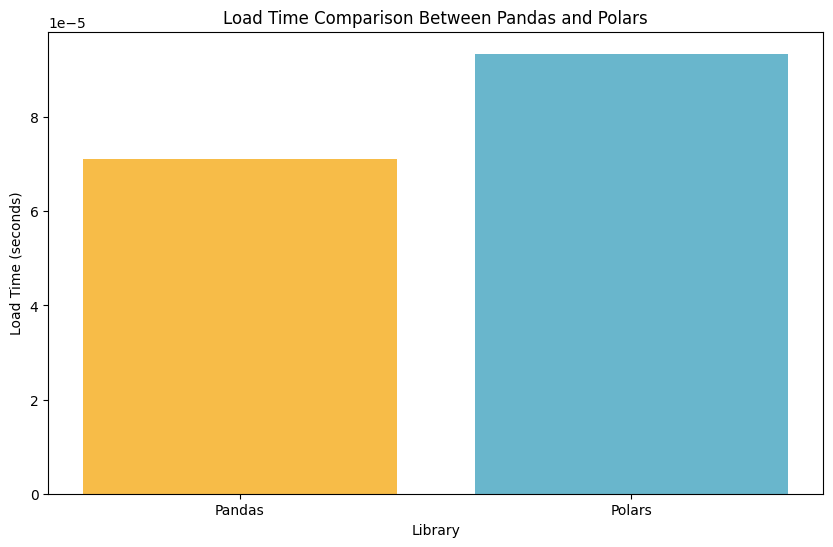

In [ ]:
libraries = ['Pandas', 'Polars']
load_times = [pandas_load_time, polars_load_time]

plt.figure(figsize=(10, 6))
plt.bar(libraries, load_times, color=['#f7bc48', '#69b6cc'])
plt.xlabel('Library')
plt.ylabel('Load Time (seconds)')
plt.title('Load Time Comparison Between Pandas and Polars')
plt.show()